In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import dash
from dash import html
from dash import html, dcc

In [2]:
df=pd.read_csv("historical_automobile_sales.csv")

In [3]:
df.sample(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
219,2/28/1994,1994,Feb,0,111.27,0.75,21231.319,1793,4,32.255,-0.532786,1.5,2851.8,Mediumfamilycar,Georgia
83,12/31/2001,2001,Dec,1,99.86,0.25,19878.062,4600,7,25.541,0.142124,5.4,691.9,Supperminicar,Georgia
280,3/31/1999,1999,Mar,0,106.32,1.50,21348.167,2205,3,63.558,-0.103606,2.0,4440.8,Mediumfamilycar,Illinois
350,2/28/2007,2007,Feb,0,84.87,0.75,18929.057,3637,4,60.551,0.145249,2.0,1754.6,Mediumfamilycar,Georgia
286,9/30/1999,1999,Sep,0,84.66,0.07,14874.287,3418,6,14.789,-1.394888,2.6,876.8,Supperminicar,New York


Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [4]:
df_line=df.groupby("Year")["Automobile_Sales"].sum()

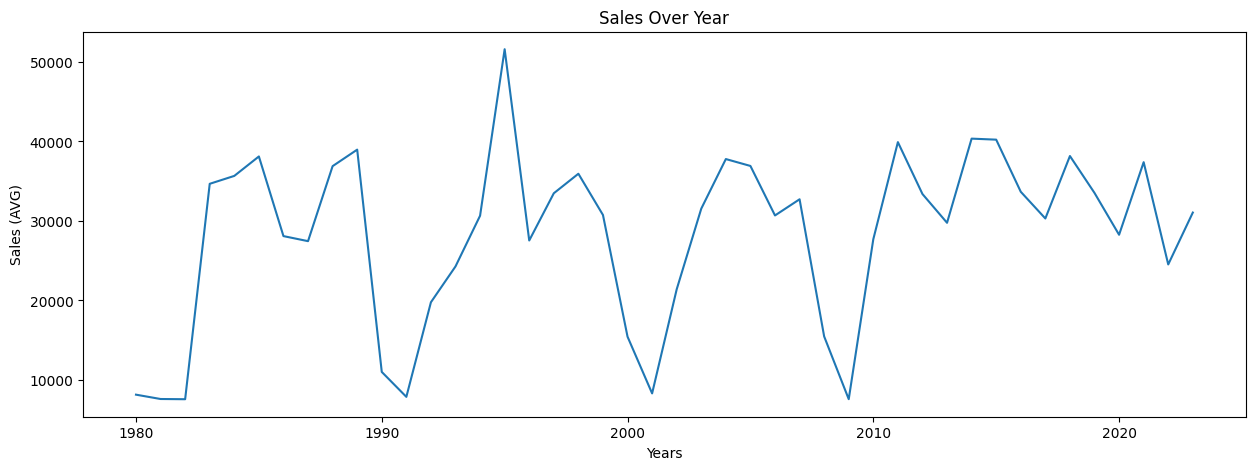

In [5]:
plt.figure(figsize=(15,5))
df_line.plot(kind="line")
plt.title("Sales Over Year")
plt.xlabel("Years")
plt.ylabel("Sales (AVG)")
plt.show()

The Year 1992 2002 and 2009 was Recession Periods where sales Dipped Alot with average Sales low as 1000 in average

In [6]:
df["Period"]=df["Recession"].apply(lambda x: "Non Recession" if x==0 else "Recession")

In [7]:
df_sales_per_type=df.groupby(["Year","Vehicle_Type"])["Automobile_Sales"].sum()
df__=df_sales_per_type.reset_index()
df__.head(5)

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,2882.5
1,1980,Smallfamiliycar,2085.7
2,1980,Supperminicar,3179.2
3,1981,Mediumfamilycar,1885.2
4,1981,Smallfamiliycar,3192.1


Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [8]:
fig = px.line(df__, x='Year', y='Automobile_Sales', color='Vehicle_Type',
              title='Vehicle Sales Trends by Type Over Years')
fig.show()


According to Graph   
1. In 1991 Recession Period all car Sales Dropped except Medium Family Car Which Dropped Less    
2. In 2001 Recession Period all car Sales Dropped  
3. In 2009 Recession Period all car Sales Dropped except Executive Car Which Dropped Less

Create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

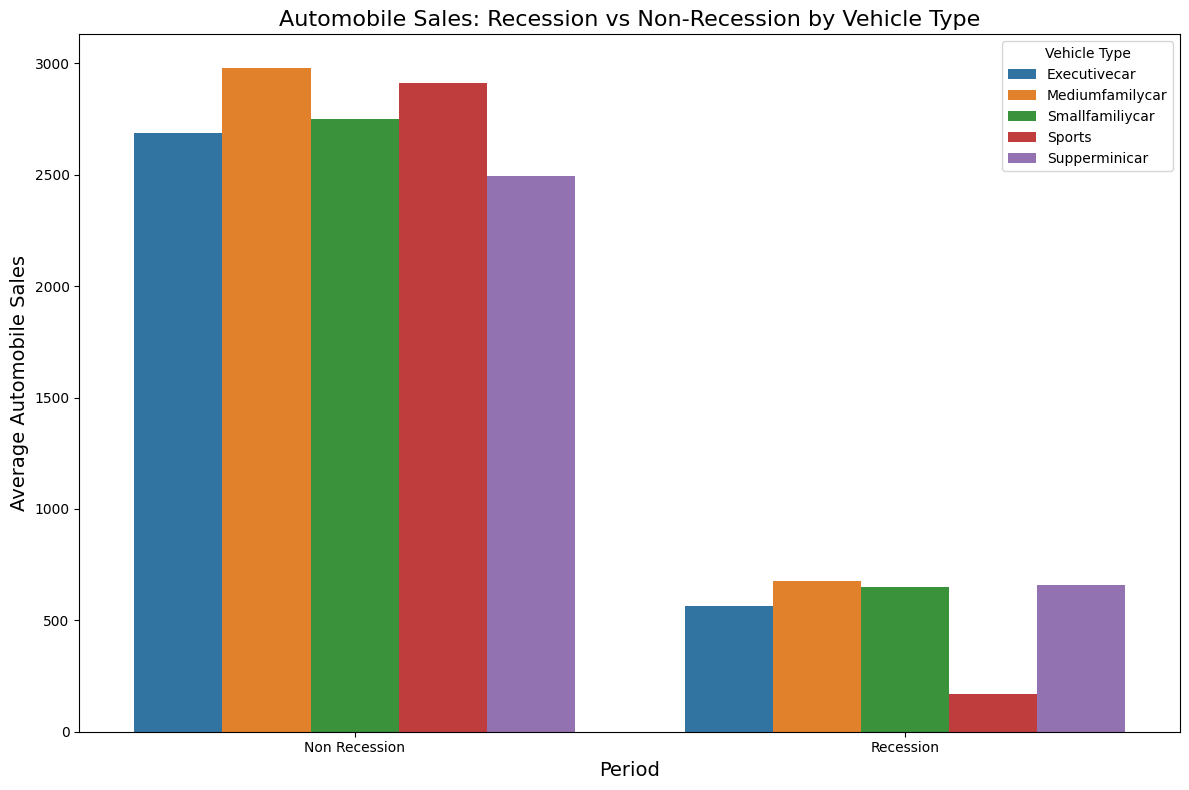

In [9]:
grouped_df = df.groupby(['Period', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(
    data=grouped_df,
    x="Period",              
    y="Automobile_Sales",
    hue="Vehicle_Type",        
    errorbar=None
)

plt.title('Automobile Sales: Recession vs Non-Recession by Vehicle Type', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Average Automobile Sales', fontsize=14)
plt.tight_layout()
plt.legend(title='Vehicle Type')
plt.show()

AS THE ABOVE BAR CHART SHOWS IN RECESSION PERIODS CAR SALES WAS BELOW 1000

In [10]:
df_gdp_rnr=df.groupby(["Year","Period"])["GDP"].sum().reset_index()

In [11]:
print(df_gdp_rnr.sample(5))

    Year         Period      GDP
40  2014  Non Recession  403.741
14  1992  Non Recession  434.089
49  2022  Non Recession  452.450
24  2000      Recession  356.293
38  2012  Non Recession  533.722


In [12]:
df_gdp_r=df_gdp_rnr[df_gdp_rnr["Period"]=="Recession"]
df_gdp_nr=df_gdp_rnr[df_gdp_rnr["Period"]=="Non Recession"]

Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

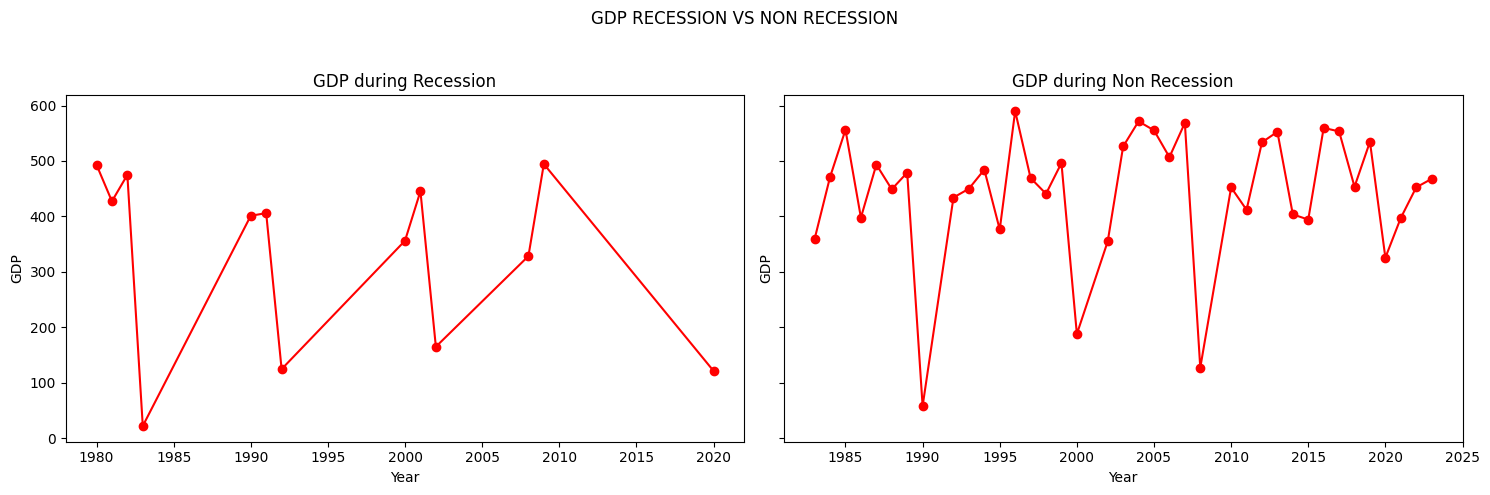

In [13]:
fig,axes=plt.subplots(1,2,figsize=(15,5),sharey=True)


axes[0].plot(df_gdp_r["Year"],df_gdp_r["GDP"],color="red",marker="o")
axes[0].set_title("GDP during Recession")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")


axes[1].plot(df_gdp_nr["Year"],df_gdp_nr["GDP"],color="red",marker="o")
axes[1].set_title("GDP during Non Recession")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP")

plt.suptitle("GDP RECESSION VS NON RECESSION")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

GDP dipped so Much in 1983 going Below 25 Million USD Dollars

The GPD during RECESSIION clearly varify the Dip of Sales in that period

In [14]:
df_buble_season=df.groupby(["Year","Month"])["Automobile_Sales"].sum().reset_index()

Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [15]:
bublefig=px.scatter(df_buble_season,x="Month",y="Automobile_Sales",size="Automobile_Sales",color="Month",hover_name="Month",size_max=60)
bublefig.show()

The Season Does not effected the Sales OverAll but in April the Sales Increased so much

In [16]:
av_sv=df[df["Period"]=="Recession"].groupby("Year")[["Price","Automobile_Sales"]].mean().reset_index()

Scatter plot of average vehicle price vs sales volume during recessions

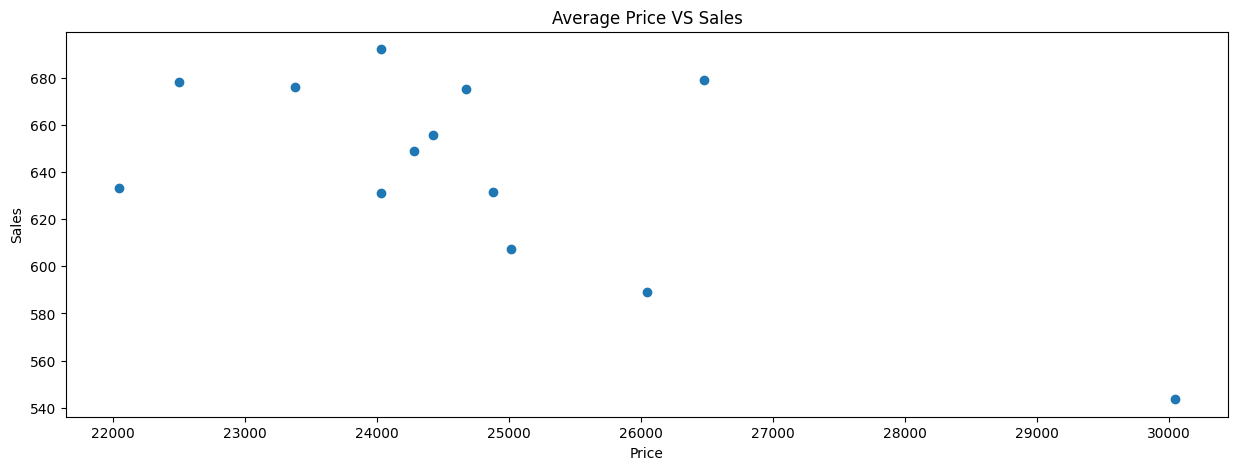

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(data=av_sv,x="Price",y="Automobile_Sales")
plt.title("Average Price VS Sales")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

This show Moderate Negtive Relationship between Price and Sales

In [18]:
cc_as=df[df["Period"]=="Recession"].groupby("Year")[["Consumer_Confidence","Automobile_Sales"]].sum().reset_index()

Identify if there a correlation between consumer confidence and automobile sales during recession period?

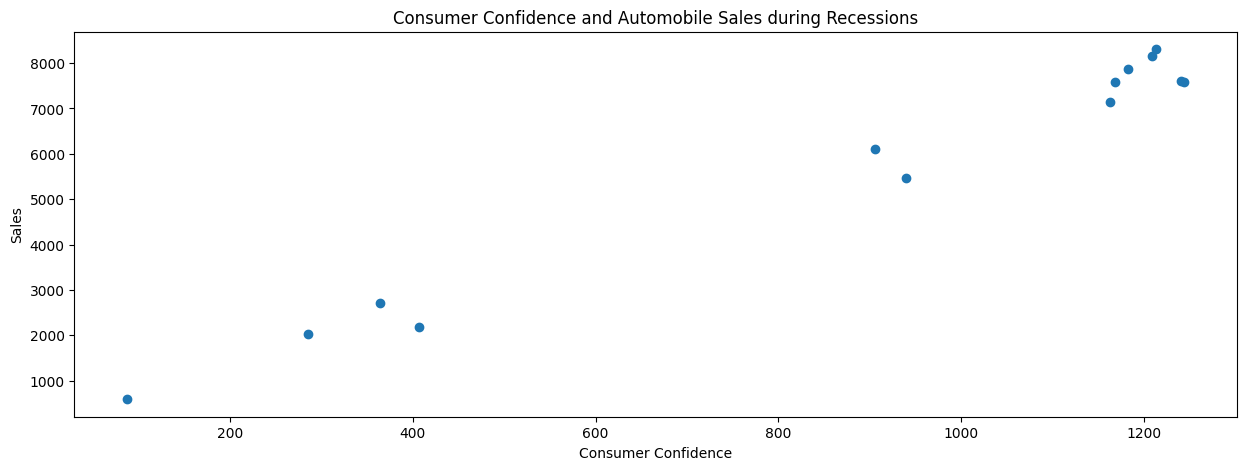

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(data=cc_as,x="Consumer_Confidence",y="Automobile_Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Sales")
plt.show()

The RelationShip is Linearly Increasing

Display a Pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods. 

In [20]:
ae_rnr=df.groupby("Period")["Advertising_Expenditure"].sum().reset_index()

In [21]:
pfig=px.pie(ae_rnr,names="Period",values="Advertising_Expenditure")
pfig.show()

The Above pie chart clearly shows that Automotive Sector Did not spended on Advertising in Recession Periods

In [22]:
tae_vt=df[df["Period"]=="Recession"].groupby("Vehicle_Type")["Advertising_Expenditure"].sum().reset_index()

Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

In [23]:
ppfig=px.pie(tae_vt,names="Vehicle_Type",values="Advertising_Expenditure")
ppfig.update_layout(height=1000,width=1000)
ppfig.show()

In period of Recession The Company Spended most of its Spending On Budget Friendly Cars 

In [24]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,Period
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,Recession
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,Recession
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,Recession
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,Recession
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,Recession


In [25]:
ur_vt_s=df[df["Period"]=="Recession"].groupby(["Year","Vehicle_Type"])[["Automobile_Sales","unemployment_rate"]].mean().reset_index()

How Unemployment rate effected sales and the types

In [26]:
ur_vt_s = (
    df[df["Period"] == "Recession"]
    .groupby(["Year", "Vehicle_Type"])
    .agg({
        "Automobile_Sales": "sum",
        "unemployment_rate": "mean"
    })
    .reset_index()
)

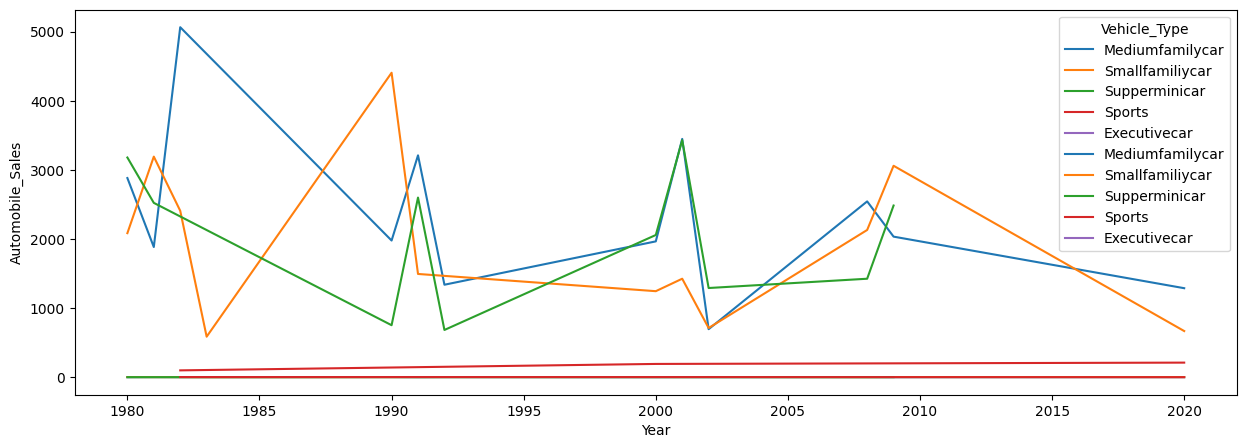

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data=ur_vt_s,x="Year",y="Automobile_Sales",hue="Vehicle_Type",markers="o")
sns.lineplot(data=ur_vt_s,x="Year",y="unemployment_rate",hue="Vehicle_Type",markers="o")
plt.show()

In [35]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={
            "textAlign": "center",
            "color": "#503D36",
            "fontSize": 24
        }
    ),

    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id="vehicle-type-dropdown",
        options=[{"label": vt, "value": vt} for vt in df__["Vehicle_Type"].unique()],
        value=df__["Vehicle_Type"].unique()[0]
    ),

    dcc.Graph(id="sales-graph")
])

@app.callback(
    dash.Output("sales-graph", "figure"),
    [dash.Input("vehicle-type-dropdown", "value")]
)
def update_graph(selected_vehicle):
    filtered_df = df__[df__["Vehicle_Type"] == selected_vehicle]
    fig = px.line(
        filtered_df,
        x="Year",
        y="Automobile_Sales",
        color="Vehicle_Type",
        title=f"Vehicle Sales Trends: {selected_vehicle}"
    )
    return fig

if __name__ == "__main__":
    app.run(debug=True, port=8052)  

In [ ]:
app = dash.Dash(__name__)

# ------------------ Plot 1 ------------------
# Automobile sales fluctuate over Recession Period (year wise)
yearly_rec = df[df["Period"]=="Recession"].groupby('Year')['Automobile_Sales'].mean().reset_index()
R_chart1 = dcc.Graph(
    figure=px.line(
        yearly_rec,
        x='Year',
        y='Automobile_Sales',
        title="Yearly Average Automobile Sales during Recession"
    )
)

# ------------------ Plot 2 ------------------
# Average number of vehicles sold by vehicle type (Bar chart)
average_sales = df[df["Period"]=="Recession"].groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
R_chart2 = dcc.Graph(
    figure=px.bar(
        average_sales,
        x='Vehicle_Type',
        y='Automobile_Sales',
        title="Average Vehicle Sales by Vehicle Type (Recession)"
    )
)

# ------------------ Plot 3 ------------------
# Total expenditure share by vehicle type (Pie chart)
exp_rec = df[df["Period"]=="Recession"].groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
R_chart3 = dcc.Graph(
    figure=px.pie(
        exp_rec,
        values='Advertising_Expenditure',
        names='Vehicle_Type',
        title="Total Advertising Expenditure Share by Vehicle Type"
    )
)

# ------------------ Plot 4 ------------------
# Effect of unemployment rate on vehicle type and sales (Bar chart)
unemp_data = df[df["Period"]=="Recession"].groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
R_chart4 = dcc.Graph(
    figure=px.bar(
        unemp_data,
        x='unemployment_rate',
        y='Automobile_Sales',
        color='Vehicle_Type',
        labels={
            'unemployment_rate': 'Unemployment Rate',
            'Automobile_Sales': 'Average Automobile Sales'
        },
        title="Effect of Unemployment Rate on Vehicle Type and Sales"
    )
)

# ------------------ Layout ------------------
app.layout = html.Div([
    html.H1("Recession Report Statistics", style={"textAlign": "center"}),

    html.Div(className='chart-item', children=[
        html.Div(children=R_chart1, style={"flex": "1", "padding": "10px"}),
        html.Div(children=R_chart2, style={"flex": "1", "padding": "10px"})
    ], style={'display': 'flex'}),

    html.Div(className='chart-item', children=[
        html.Div(children=R_chart3, style={"flex": "1", "padding": "10px"}),
        html.Div(children=R_chart4, style={"flex": "1", "padding": "10px"})
    ], style={'display': 'flex'})
])

if __name__ == "__main__":
    app.run(debug=True, port=8051)  

In [ ]:
%pip install asyncio

In [ ]:
import panel as pn
pn.extension()

In [ ]:
df = pd.DataFrame({
    "Year": [2018, 2019, 2020, 2021] * 2,
    "Automobile_Sales": [100, 120, 90, 130, 80, 110, 70, 100],
    "Vehicle_Type": ["Car", "Car", "Car", "Car", "Truck", "Truck", "Truck", "Truck"]
})

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Year", y="Automobile_Sales", hue="Vehicle_Type", errorbar=None, ax=ax)
ax.set_title("Vehicle Sales Trends: Recession vs Non-Recession Periods")
plt.xticks(rotation=45)

# Dashboard
dashboard = pn.Column(
    "# Automobile Sales Statistics Dashboard",
    pn.pane.Matplotlib(fig, tight=True)
)

# Async serve function
async def run_panel():
    pn.serve(dashboard, port=8055, show=True)

# Run without blocking notebook
asyncio.get_event_loop().create_task(run_panel())